In [170]:
# data pulled 1/26/2020

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy import stats

In [172]:
df = pd.read_csv('data\listings.csv.gz',compression='gzip',low_memory=False)

In [173]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df.transpose().iloc[:,:3].head()
# viewing all columns

,0,1,2
id,958,3850,5858
listing_url,https://www.airbnb.com/rooms/958,https://www.airbnb.com/rooms/3850,https://www.airbnb.com/rooms/5858
scrape_id,20191204162709,20191204162709,20191204162709
last_scraped,2019-12-04,2019-12-04,2019-12-05
name,"Bright, Modern Garden Unit - 1BR/1B",Charming room for two,Creative Sanctuary


In [174]:
cols = ['id',
        'host_id',
        'summary',
        'description',
        'transit',
        'host_neighbourhood',
        'host_is_superhost',
        'host_has_profile_pic',
        'zipcode',
        'property_type',
        'room_type',
        'accommodates',
        'bathrooms',
        'bedrooms',
        'beds',
        'bed_type',
        'amenities',
        'price',
        'minimum_nights',
        'instant_bookable',
        'is_business_travel_ready',
        'cancellation_policy',
        'availability_30',
        'number_of_reviews',
        'review_scores_rating',
        'calculated_host_listings_count'
        ]
#add transit acess, summary, description, NLP 

In [175]:
data = pd.read_csv('data\listings.csv.gz',compression='gzip',usecols=cols)
data.head()

,id,summary,description,transit,host_id,host_is_superhost,host_neighbourhood,host_has_profile_pic,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,calculated_host_listings_count
0,958,New update: the house next door is under const...,New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,1169,t,Duboce Triangle,t,94117,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",$170.00,1,2,226,97.0,f,f,moderate,1
1,3850,Your own private room plus access to a shared ...,Your own private room plus access to a shared ...,Public transit service to my house is outstand...,4921,t,Inner Sunset,t,94131,House,Private room,2,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,Breakfast,""Free street ...",$99.00,1,18,175,95.0,f,f,strict_14_with_grace_period,3
2,5858,NaN,We live in a large Victorian house on a quiet ...,The train is two blocks away and you can stop ...,8904,f,Bernal Heights,t,94110,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",$235.00,30,1,111,98.0,f,f,strict_14_with_grace_period,1
3,7918,Nice and good public transportation. 7 minute...,Nice and good public transportation. 7 minute...,N Juda Muni and bus stop. Street parking.,21994,t,Cole Valley,t,94117,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,32,30,18,86.0,f,f,strict_14_with_grace_period,9
4,8142,Nice and good public transportation. 7 minute...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",21994,t,Cole Valley,t,94117,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"{TV,Internet,Wifi,Kitchen,""Free street parking...",$65.00,32,30,8,93.0,f,f,strict_14_with_grace_period,9


In [176]:
data.info(verbose=True, null_counts=True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8533 entries, 0 to 8532
Data columns (total 26 columns):
id                                8533 non-null int64
summary                           8320 non-null object
description                       8492 non-null object
transit                           5927 non-null object
host_id                           8533 non-null int64
host_is_superhost                 8479 non-null object
host_neighbourhood                7968 non-null object
host_has_profile_pic              8479 non-null object
zipcode                           8288 non-null object
property_type                     8533 non-null object
room_type                         8533 non-null object
accommodates                      8533 non-null int64
bathrooms                         8528 non-null float64
bedrooms                          8530 non-null float64
beds                              8521 non-null float64
bed_type                          8533 non-null object
amenities    

In [177]:
# viewing null values
data.isnull().sum().sort_values(ascending=False)

transit                           2606
review_scores_rating              1932
host_neighbourhood                 565
zipcode                            245
summary                            213
host_is_superhost                   54
host_has_profile_pic                54
description                         41
beds                                12
bathrooms                            5
bedrooms                             3
room_type                            0
host_id                              0
property_type                        0
calculated_host_listings_count       0
accommodates                         0
cancellation_policy                  0
bed_type                             0
amenities                            0
price                                0
minimum_nights                       0
availability_30                      0
number_of_reviews                    0
instant_bookable                     0
is_business_travel_ready             0
id                       

In [178]:
# these 4 cols have small amount of null values, so it's safe to drop
data.dropna(how='any', subset=['transit','review_scores_rating','host_neighbourhood',
                               'zipcode','summary','host_is_superhost',
                               'host_has_profile_pic','description','beds',
                               'bathrooms','bedrooms'],inplace=True)

In [179]:
# remove '$' from price col and transform to float
data['price'] = data['price'].str.replace('$','').str.replace(',','')
data['price'] = data['price'].astype(float)

In [180]:
data['zipcode'].unique()

array(['94117', '94131', '94110', '94107', '94109', '94102', '94105',
       '94133', '94114', '94115', '94121', '94118', '94127', '94104',
       '94123', '94111', '94103', '94112', '94122', '94116', '94108',
       '94124', '94129', '94132', '94134', '94158', '94014', 'CA',
       '94015'], dtype=object)

In [181]:
data['zipcode'] = data['zipcode'].str.replace('CA ','')

In [182]:
drop_zip = data[data['zipcode'] == 'CA']
data.drop(drop_zip.index,inplace=True)

In [183]:
data['zipcode'] = data['zipcode'].astype(int)

In [184]:
data['zipcode'].unique() # zipcodes are now clean

array([94117, 94131, 94110, 94107, 94109, 94102, 94105, 94133, 94114,
       94115, 94121, 94118, 94127, 94104, 94123, 94111, 94103, 94112,
       94122, 94116, 94108, 94124, 94129, 94132, 94134, 94158, 94014,
       94015], dtype=int64)

In [185]:
data = data[data['accommodates'] != 0]
data = data[data['bathrooms'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

In [187]:
# data.nlargest(5,'price') # identifying price outliers

In [188]:
price_drop1 = data.loc[data['id'] == 1059961]
price_drop2 = data.loc[data['id'] == 14887262]
price_drop3 = data.loc[data['id'] == 37978128]
price_drop4 = data.loc[data['id'] == 8066789]

In [189]:
data.drop(price_drop1.index,inplace=True)
data.drop(price_drop2.index,inplace=True)
data.drop(price_drop3.index,inplace=True)
data.drop(price_drop4.index,inplace=True)
# dropped highest 4 outliers

# Amenities

In [190]:
data[['amenities']].head()

,amenities
0,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv..."
1,"{Internet,Wifi,Kitchen,Breakfast,""Free street ..."
3,"{TV,Internet,Wifi,Kitchen,""Free street parking..."
4,"{TV,Internet,Wifi,Kitchen,""Free street parking..."
6,"{TV,""Cable TV"",Internet,Wifi,""Pets live on thi..."


In [191]:
data['amenities'] = data['amenities'].str.replace('}',"")
data['amenities'] = data['amenities'].str.replace('{',"")
data['amenities'] = data['amenities'].str.replace('"',"")
data['amenities'] = data['amenities'].str.split(',')

In [192]:
# below is amenities work

In [193]:
amenities = data['amenities']
amenities_dummies = pd.get_dummies(amenities.apply(pd.Series).stack()).sum(level=0)

In [194]:
amenities_df = pd.concat([data, amenities_dummies], axis=1)
# pd.DataFrame(amenities.apply(pd.Series).stack().value_counts()) # viewing top 10 amenities

In [195]:
amenities_df.drop([
        'host_id',
        'summary',
        'description',
        'transit',
        'host_neighbourhood',
        'host_is_superhost',
        'host_has_profile_pic',
        'zipcode',
        'property_type',
        'room_type',
        'accommodates',
        'bathrooms',
        'bedrooms',
        'beds',
        'bed_type',
        'amenities',
        'minimum_nights',
        'instant_bookable',
        'is_business_travel_ready',
        'cancellation_policy',
        'availability_30',
        'number_of_reviews',
        'review_scores_rating',
        'calculated_host_listings_count'], axis=1,inplace=True)

In [196]:
top_10_amenities = amenities_df[['id','price','Wifi','Essentials',
                                 'Smoke detector','Heating','Hangers',
                                 'Hair dryer','Shampoo','Carbon monoxide detector',
                                 'Iron','Laptop friendly workspace']] 

top_10_amenities.head()

,id,price,Wifi,Essentials,Smoke detector,Heating,Hangers,Hair dryer,Shampoo,Carbon monoxide detector,Iron,Laptop friendly workspace
0,958,170.0,1,1,1,1,1,1,1,1,1,1
1,3850,99.0,1,1,1,1,0,0,1,1,0,0
3,7918,65.0,1,0,1,1,1,0,0,1,0,0
4,8142,65.0,1,0,1,1,0,0,0,1,0,0
6,8739,139.0,1,1,1,1,1,1,1,1,1,1


In [197]:
amenities_melt = pd.melt(top_10_amenities, id_vars=['price','id'], 
                         value_vars=['Wifi','Essentials','Smoke detector',
                                     'Heating','Hangers','Hair dryer',
                                     'Shampoo','Carbon monoxide detector','Iron',
                                     'Laptop friendly workspace'])
amenities_melt = amenities_melt[amenities_melt.value != 0]

price_drop1 = amenities_melt.loc[amenities_melt['id'] == 1059961]
price_drop2 = amenities_melt.loc[amenities_melt['id'] == 14887262]
price_drop3 = amenities_melt.loc[amenities_melt['id'] == 37978128]
price_drop4 = amenities_melt.loc[amenities_melt['id'] == 8066789]

amenities_melt.drop(price_drop1.index,inplace=True)
amenities_melt.drop(price_drop2.index,inplace=True)
amenities_melt.drop(price_drop3.index,inplace=True)
amenities_melt.drop(price_drop4.index,inplace=True)

# dropped highest 4 outliers

amenities_melt.head()

,price,id,variable,value
0,170.0,958,Wifi,1
1,99.0,3850,Wifi,1
2,65.0,7918,Wifi,1
3,65.0,8142,Wifi,1
4,139.0,8739,Wifi,1


In [198]:
amenities_melt.variable.value_counts() #all values >20 n count

Wifi                         4221
Essentials                   4149
Smoke detector               4107
Heating                      4065
Hangers                      3965
Hair dryer                   3883
Shampoo                      3860
Carbon monoxide detector     3769
Iron                         3655
Laptop friendly workspace    3591
Name: variable, dtype: int64

In [199]:
medians = amenities_melt.groupby(['variable'])['price'].median()
medians.sort_values(ascending=False, inplace=True)
medians

variable
Laptop friendly workspace    159.0
Iron                         158.0
Shampoo                      155.0
Carbon monoxide detector     154.0
Wifi                         150.0
Smoke detector               150.0
Heating                      150.0
Hangers                      150.0
Hair dryer                   150.0
Essentials                   150.0
Name: price, dtype: float64

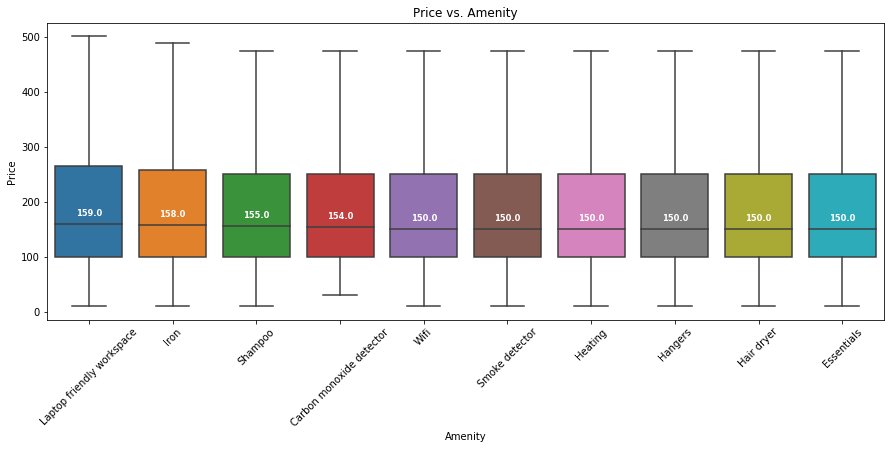

In [200]:
fig = plt.figure(figsize=(15,12))

_ = plt.subplot(2,1,1)
box_plot = sns.boxplot('variable','price',data=amenities_melt,
                       showfliers=False,order=['Laptop friendly workspace','Iron','Shampoo',
                                              'Carbon monoxide detector','Wifi','Smoke detector',
                                              'Heating','Hangers','Hair dryer','Essentials']) #outliers removed
_ = plt.xlabel('Amenity')
_ = plt.ylabel('Price')
_ = plt.xticks(rotation=45)
_ = plt.title('Price vs. Amenity')

vertical_offset = amenities_melt['price'].median() * 0.1 # offset from median for display

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='small',color='w',weight='semibold')

There is no visible difference between the top 10 amenities. Below are the correlations and p-values for each amenity.

PointbiserialrResult(correlation=0.9999999999999998, pvalue=0.0) price

PointbiserialrResult(correlation=0.01579751912722372, pvalue=0.3038) Wifi

PointbiserialrResult(correlation=0.03345214471234936, pvalue=0.0294) Essentials

PointbiserialrResult(correlation=0.05154277800126561, pvalue=0.0008) Smoke detector

PointbiserialrResult(correlation=0.06864735913161632, pvalue=7.6977e-06) Heating

PointbiserialrResult(correlation=0.052132492489858254, pvalue=0.0007) Hangers

PointbiserialrResult(correlation=0.06319175940939041, pvalue=3.8356e-05) Hair dryer

PointbiserialrResult(correlation=0.10212579074019067, pvalue=2.6532e-11) Shampoo

PointbiserialrResult(correlation=0.07296066796370512, pvalue=1.9821e-06) Carbon monoxide detector

PointbiserialrResult(correlation=0.10358290865464825, pvalue=1.3777e-11) Iron

PointbiserialrResult(correlation=0.11565365651997678, pvalue=4.2512e-14) Laptop friendly workspace

In [201]:
top_10_amenities = top_10_amenities.drop('id',axis=1)

In [202]:
top_10_amenities.head()

,price,Wifi,Essentials,Smoke detector,Heating,Hangers,Hair dryer,Shampoo,Carbon monoxide detector,Iron,Laptop friendly workspace
0,170.0,1,1,1,1,1,1,1,1,1,1
1,99.0,1,1,1,1,0,0,1,1,0,0
3,65.0,1,0,1,1,1,0,0,1,0,0
4,65.0,1,0,1,1,0,0,0,1,0,0
6,139.0,1,1,1,1,1,1,1,1,1,1


In [203]:
for x, y in top_10_amenities.iteritems():
    pb = stats.pointbiserialr(top_10_amenities.price,y)   
    print(pb, x)

# point biserial for top 10 amenities (price vs. amenities)
# check p-val for significance on price; show relationships with price when writing summary

PointbiserialrResult(correlation=0.9999999999999998, pvalue=0.0) price
PointbiserialrResult(correlation=0.01579751912722372, pvalue=0.3038089981732974) Wifi
PointbiserialrResult(correlation=0.03345214471234936, pvalue=0.029409301493400323) Essentials
PointbiserialrResult(correlation=0.05154277800126561, pvalue=0.0007877360633036795) Smoke detector
PointbiserialrResult(correlation=0.06864735913161632, pvalue=7.697676067873577e-06) Heating
PointbiserialrResult(correlation=0.052132492489858254, pvalue=0.0006849597286590161) Hangers
PointbiserialrResult(correlation=0.06319175940939041, pvalue=3.835603752693557e-05) Hair dryer
PointbiserialrResult(correlation=0.10212579074019067, pvalue=2.653230373244406e-11) Shampoo
PointbiserialrResult(correlation=0.07296066796370512, pvalue=1.9821907390930447e-06) Carbon monoxide detector
PointbiserialrResult(correlation=0.10358290865464825, pvalue=1.3776643447312024e-11) Iron
PointbiserialrResult(correlation=0.11565365651997678, pvalue=4.251215270191258

In [204]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [205]:
import scipy.stats as ss
cramers_v(amenities_df.Beachfront.values,amenities_df.Balcony.values)

0.0

# Cancellation Policy

In [207]:
data['cancellation_policy'].unique()

array(['moderate', 'strict_14_with_grace_period', 'flexible',
       'super_strict_30', 'strict'], dtype=object)

In [208]:
data.cancellation_policy.value_counts() 

# checking n values; drop <20 for boxplot
# drop super strict 30 and strict

strict_14_with_grace_period    1890
moderate                       1730
flexible                        611
super_strict_30                   7
strict                            1
Name: cancellation_policy, dtype: int64

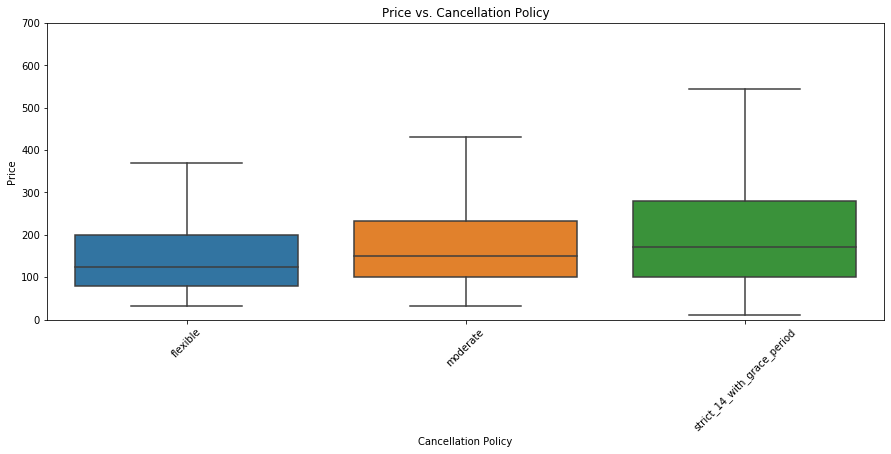

In [209]:
plt.figure(figsize=(15,12))

_ = plt.subplot(2,1,1)
_ = plt.ylim(0,700) # this shows outliers; showfliers is a better option since we can't see all outliers
_ = sns.boxplot('cancellation_policy','price',data=data,showfliers=False,order=['flexible','moderate',
                                                                                'strict_14_with_grace_period'])
_ = plt.title('Price vs. Cancellation Policy')
_ = plt.xlabel('Cancellation Policy')
_ = plt.ylabel('Price')
_ = plt.xticks(rotation=45)

In [210]:
cancellation_policy_dummies = pd.get_dummies(data['cancellation_policy'])

data = pd.concat((data.drop(['cancellation_policy'], axis=1),
    cancellation_policy_dummies.astype(int)),
    axis=1)

In [212]:
del data['strict']
del data['super_strict_30']

# dropped the 2 above policies bc less than 20 rows

# Price 

In [213]:
data = data[data["price"] <= 750]

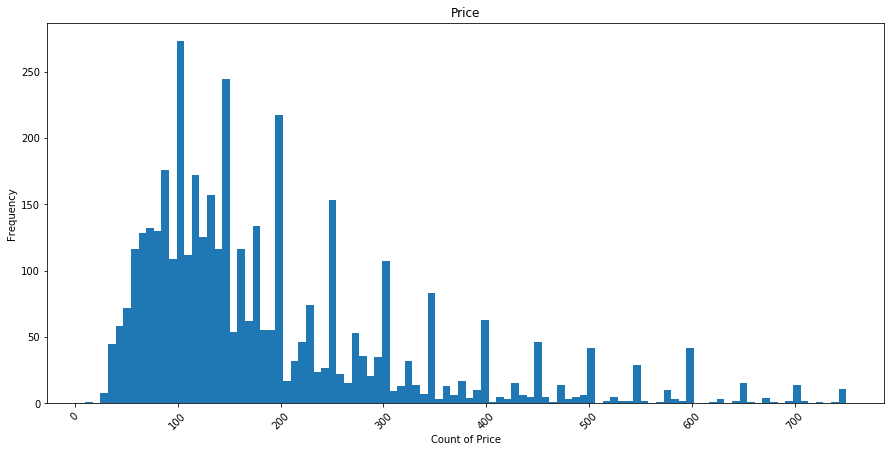

In [215]:
plt.figure(figsize=(15,7))
plt.hist(data['price'], bins=100)
plt.title("Price")
plt.xlabel("Count of Price")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

# graph shows right skewed data

The price histogram shows strongly right-skewed data.  The majority of prices are very low in comparison to the few high-priced Airbnbs which skew the data.  

In [216]:
data['price'].sort_values() 

2176     10.0
271      30.0
270      30.0
5993     31.0
6978     31.0
        ...  
4381    750.0
6088    750.0
3126    750.0
6817    750.0
770     750.0
Name: price, Length: 4118, dtype: float64

Text(0.5, 0, 'Price')

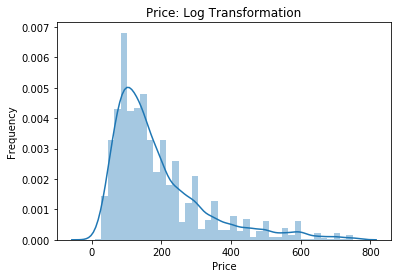

In [217]:
price_log = sns.distplot(data['price'])
price_log.set_title('Price: Log Transformation')
price_log.set_ylabel('Frequency')
price_log.set_xlabel('Price')

In [218]:
price_data = np.log(data['price'])

Text(0.5, 0, 'Price')

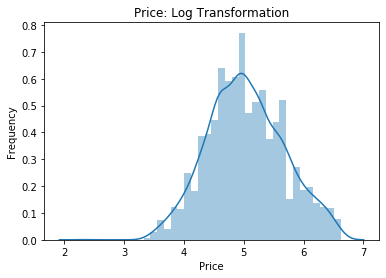

In [219]:
price_log = sns.distplot(price_data)
price_log.set_title('Price: Log Transformation')
price_log.set_ylabel('Frequency')
price_log.set_xlabel('Price')

To account for the strongly right-skewed data, the pricing data is log transformed.  Now, the pricing data is more evenly distributed. 

In [220]:
# normality test on logged price

stats.normaltest(price_data)

NormaltestResult(statistic=35.77395308887814, pvalue=1.70523716285914e-08)

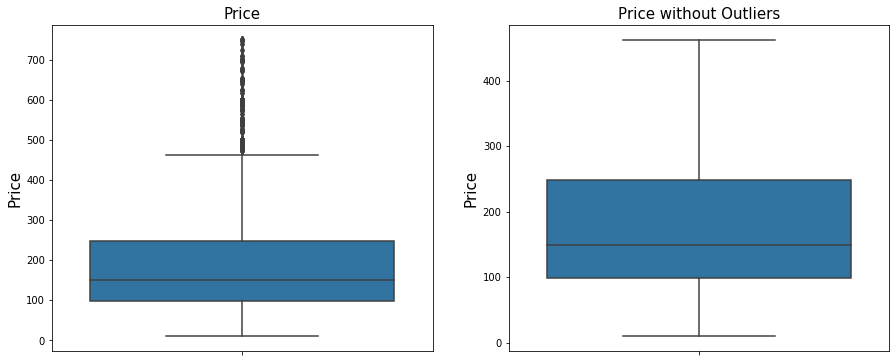

In [221]:
_ = plt.figure(figsize=(15,6))
_ = plt.subplot(1,2,1)
_ = sns.boxplot(y='price', data=data)
_ = plt.title('Price', fontsize=15)
_ = plt.ylabel('Price', fontsize=15)

_ = plt.subplot(1,2,2)
_ = sns.boxplot(y='price', data=data, showfliers=False)
_ = plt.title('Price without Outliers', fontsize=15)
_ = plt.ylabel('Price', fontsize=15)
plt.show()

The boxplots above show how highly right-skewed the data is.  The boxplot without outliers better depicts the price range between 100 and 250.

# Accommodations

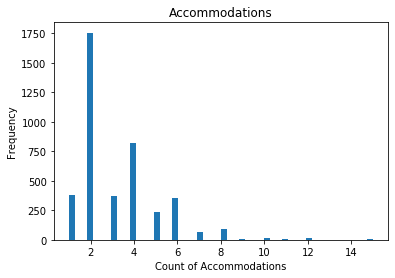

In [222]:
plt.hist(data['accommodates'], bins=50)
plt.title("Accommodations")
plt.xlabel("Count of Accommodations")
plt.ylabel("Frequency")
plt.show()

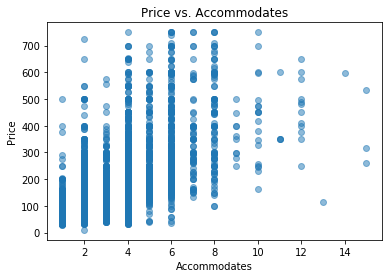

In [223]:
plt.scatter(data.accommodates, data.price, alpha=0.5)
plt.title('Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.show()

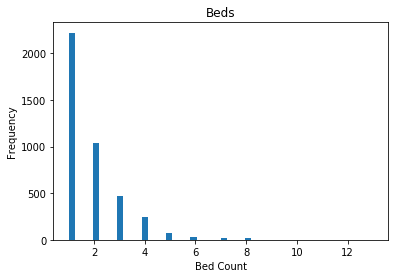

In [224]:
plt.hist(data['beds'], bins=50)
plt.title("Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

The vast majority listings offer one bed, again showing Airbnb strongly caters to solo and coupled guests.  The amount of listings decreases as each bed count increases.  

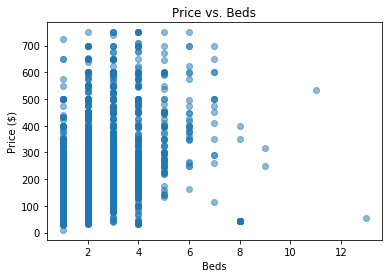

In [225]:
plt.scatter(data.beds, data.price, alpha=0.5)
plt.title('Price vs. Beds')
plt.xlabel('Beds')
plt.ylabel('Price ($)')
plt.show() #should be boxplot

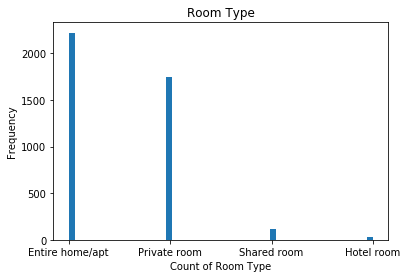

In [226]:
plt.hist(data['room_type'], bins=50)
plt.title("Room Type")
plt.xlabel("Count of Room Type")
plt.ylabel("Frequency")
plt.show()

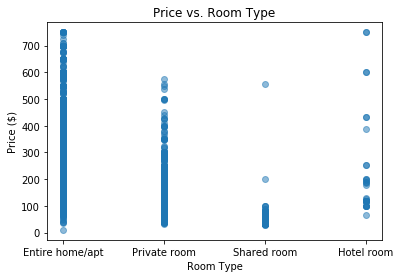

In [227]:
plt.scatter(data.room_type, data.price, alpha=0.5)
plt.title('Price vs. Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show() #should be boxplot

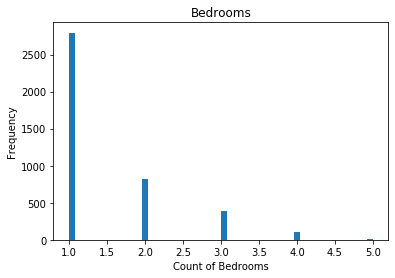

In [228]:
plt.hist(data['bedrooms'], bins=50)
plt.title("Bedrooms")
plt.xlabel("Count of Bedrooms")
plt.ylabel("Frequency")
plt.show()

One bedroom comprises the majority of listings.

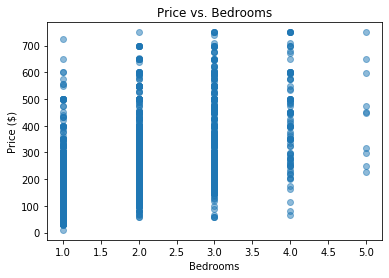

In [229]:
plt.scatter(data.bedrooms, data.price, alpha=0.5)
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.show()
#should be boxplot

In [230]:
# add histogram of price and also logged price

In [231]:
data[['price','accommodates','beds','bedrooms']].transpose()

,0,1,3,4,6,7,10,11,12,13,14,16,18,20,21,22,24,25,27,28,31,32,33,34,35,36,38,41,42,44,47,48,49,50,51,54,57,59,60,61,63,64,66,67,68,69,70,72,73,75,76,79,81,83,84,87,88,90,91,94,100,102,103,104,106,107,109,111,113,117,118,121,125,127,128,131,135,136,137,139,140,141,142,144,145,146,148,153,154,155,156,157,158,160,165,166,167,172,173,174,177,178,180,183,184,185,186,187,188,191,192,193,194,195,196,197,199,200,201,202,203,204,205,207,209,210,211,213,214,215,217,219,225,226,231,232,234,235,236,237,238,239,240,245,248,251,252,254,255,260,261,263,264,265,266,267,268,270,271,273,274,275,276,278,279,281,282,283,284,286,287,288,289,290,293,295,296,297,298,299,301,302,303,305,306,307,311,314,315,316,317,319,320,322,323,325,326,329,330,331,332,335,336,337,338,341,342,347,348,349,350,353,354,355,358,361,362,363,365,366,367,368,369,371,374,376,377,378,380,381,384,386,387,390,391,392,394,395,397,398,399,400,402,403,405,406,407,410,411,412,...,7314,7316,7322,7330,7332,7333,7334,7337,7345,7347,7349,7364,7365,7366,7369,7377,7379,7383,7384,7393,7394,7398,7399,7400,7404,7407,7414,7416,7419,7420,7421,7423,7426,7435,7438,7441,7452,7455,7465,7467,7469,7470,7471,7473,7474,7475,7480,7482,7486,7487,7488,7489,7493,7494,7496,7498,7502,7503,7504,7505,7506,7511,7512,7514,7515,7516,7517,7518,7521,7525,7527,7528,7529,7530,7534,7535,7536,7540,7543,7548,7550,7551,7556,7557,7558,7563,7566,7569,7570,7571,7579,7581,7588,7590,7625,7626,7629,7632,7634,7636,7638,7651,7653,7656,7664,7670,7671,7674,7677,7687,7689,7691,7693,7694,7695,7700,7704,7706,7707,7708,7710,7712,7715,7721,7722,7723,7726,7731,7733,7734,7735,7737,7738,7739,7740,7743,7744,7745,7747,7750,7752,7757,7758,7763,7765,7769,7775,7777,7780,7781,7785,7788,7794,7796,7797,7798,7799,7801,7804,7811,7814,7815,7819,7822,7823,7827,7833,7836,7853,7854,7855,7856,7859,7864,7867,7868,7879,7882,7885,7888,7897,7898,7917,7922,7924,7928,7969,7972,7974,7979,7995,8000,8004,8007,8008,8017,8019,8027,8031,8034,8035,8037,8039,8041,8055,8056,8072,8073,8092,8094,8096,8105,8115,8116,8123,8124,8125,8126,8137,8141,8143,8144,8159,8186,8191,8213,8223,8226,8233,8234,8235,8298,8301,8314,8315,8316,8317,8327,8328,8344,8345,8358,8363,8364,8365,8368,8369,8372,8376,8428
price,170.0,99.0,65.0,65.0,139.0,135.0,177.0,194.0,139.0,85.0,85.0,160.0,450.0,110.0,125.0,65.0,155.0,159.0,195.0,150.0,450.0,125.0,199.0,220.0,155.0,150.0,107.0,67.0,159.0,290.0,85.0,104.0,150.0,110.0,95.0,78.0,119.0,90.0,163.0,185.0,112.0,116.0,187.0,200.0,175.0,99.0,350.0,109.0,150.0,475.0,85.0,90.0,216.0,326.0,80.0,185.0,108.0,45.0,109.0,45.0,135.0,75.0,140.0,83.0,250.0,90.0,85.0,201.0,185.0,130.0,125.0,125.0,65.0,69.0,300.0,102.0,150.0,90.0,399.0,230.0,275.0,165.0,115.0,75.0,85.0,69.0,185.0,100.0,220.0,75.0,90.0,150.0,138.0,182.0,295.0,79.0,165.0,325.0,147.0,75.0,139.0,145.0,45.0,175.0,99.0,99.0,135.0,45.0,160.0,280.0,139.0,100.0,115.0,45.0,45.0,114.0,115.0,250.0,133.0,35.0,325.0,89.0,97.0,575.0,57.0,89.0,300.0,475.0,300.0,190.0,299.0,312.0,48.0,327.0,99.0,165.0,595.0,95.0,119.0,160.0,190.0,185.0,58.0,90.0,95.0,70.0,672.0,390.0,102.0,169.0,189.0,99.0,289.0,119.0,132.0,68.0,140.0,30.0,30.0,123.0,116.0,109.0,350.0,324.0,190.0,57.0,89.0,425.0,225.0,160.0,145.0,490.0,280.0,125.0,90.0,230.0,550.0,195.0,205.0,125.0,375.0,130.0,225.0,170.0,100.0,295.0,275.0,131.0,90.0,135.0,550.0,495.0,70.0,112.0,449.0,650.0,140.0,129.0,220.0,450.0,105.0,95.0,68.0,460.0,129.0,93.0,139.0,295.0,195.0,98.0,121.0,125.0,105.0,350.0,79.0,279.0,123.0,125.0,280.0,50.0,95.0,79.0,280.0,500.0,250.0,85.0,90.0,475.0,585.0,282.0,450.0,135.0,150.0,450.0,395.0,145.0,160.0,79.0,379.0,322.0,153.0,210.0,139.0,275.0,520.0,162.0,185.0,123.0,115.0,120.0,...,138.0,275.0,400.0,150.0,700.0,122.0,150.0,80.0,205.0,109.0,76.0,130.0,90.0,90.0,334.0,150.0,350.0,600.0,750.0,45.0,400.0,58.0,599.0,268.0,249.0,150.0,50.0,170.0,89.0,119.0,130.0,120.0,120.0,135.0,84.0,180.0,222.0,95.0,95.0,95.0,85.0,110.0,129.0,100.0,80.0,150.0,105.0,275.0,400.0,129.0,295.0,307.0,135.0,350.0,299.0,245.0,319.0,100.0,500.0,265.0,100.0,599.0,66.0,199.0,1

# Categorical - Continuous Correlation Matrix:

In [232]:
data.is_business_travel_ready.unique()

array(['f'], dtype=object)

In [233]:
data[['host_is_superhost','host_has_profile_pic','instant_bookable']].head()

,host_is_superhost,host_has_profile_pic,instant_bookable
0,t,t,f
1,t,t,f
3,t,t,f
4,t,t,f
6,t,t,t


In [234]:
categ_cont = data[['price','host_is_superhost','host_has_profile_pic','instant_bookable']]
categ_cont.head(10)

,price,host_is_superhost,host_has_profile_pic,instant_bookable
0,170.0,t,t,f
1,99.0,t,t,f
3,65.0,t,t,f
4,65.0,t,t,f
6,139.0,t,t,t
7,135.0,t,t,f
10,177.0,f,t,f
11,194.0,f,t,f
12,139.0,f,t,f
13,85.0,t,t,f


In [235]:
categ_cont['host_is_superhost'] = categ_cont['host_is_superhost'].map({'t': '1', 'f': '0'})
categ_cont['host_has_profile_pic'] = categ_cont['host_has_profile_pic'].map({'t': '1', 'f': '0'})
categ_cont['instant_bookable'] = categ_cont['instant_bookable'].map({'t': '1', 'f': '0'})

categ_cont.head(10)

,price,host_is_superhost,host_has_profile_pic,instant_bookable
0,170.0,1,1,0
1,99.0,1,1,0
3,65.0,1,1,0
4,65.0,1,1,0
6,139.0,1,1,1
7,135.0,1,1,0
10,177.0,0,1,0
11,194.0,0,1,0
12,139.0,0,1,0
13,85.0,1,1,0


In [236]:
# converting to integer

categ_cont['host_is_superhost'] = categ_cont['host_is_superhost'].astype(int)
categ_cont['host_has_profile_pic'] = categ_cont['host_has_profile_pic'].astype(int)
categ_cont['instant_bookable'] = categ_cont['instant_bookable'].astype(int)

In [237]:
for x, y in categ_cont.iteritems():
    pointbi = stats.pointbiserialr(categ_cont.price,y)   
    print(pointbi, x)

# point biserial 
# check p-val for significance on price; show relationships with price when writing summary

# add to data story for inferential stats

PointbiserialrResult(correlation=1.0, pvalue=0.0) price
PointbiserialrResult(correlation=-0.03456730354079979, pvalue=0.02653914201402594) host_is_superhost
PointbiserialrResult(correlation=0.05498839232908612, pvalue=0.00041509595286030914) host_has_profile_pic
PointbiserialrResult(correlation=-0.08525404813485205, pvalue=4.272313246405503e-08) instant_bookable


In [238]:
categ_cont_corr = categ_cont.corr()
categ_cont_corr

,price,host_is_superhost,host_has_profile_pic,instant_bookable
price,1.000000,-0.034567,0.054988,-0.085254
host_is_superhost,-0.034567,1.000000,0.090237,-0.014394
host_has_profile_pic,0.054988,0.090237,1.000000,-0.100957
instant_bookable,-0.085254,-0.014394,-0.100957,1.000000


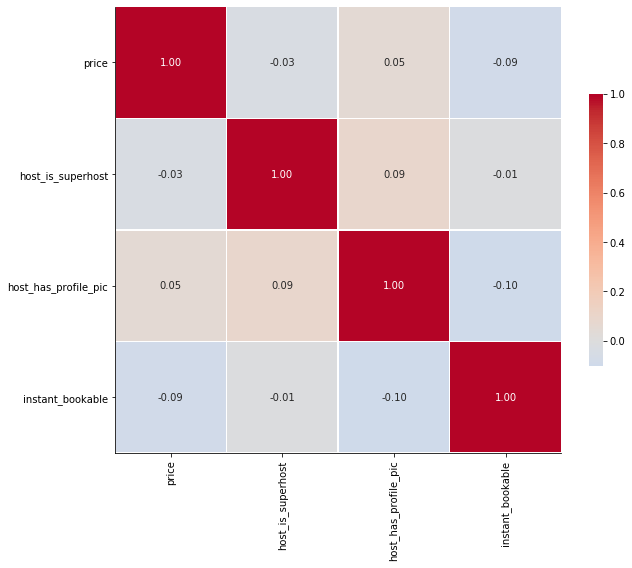

In [239]:
ax = sns.heatmap(categ_cont_corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
ax.figure.set_size_inches(10,10)
 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + .5, top - 0.5)

plt.show()

In [240]:
data.head(1)

,id,summary,description,transit,host_id,host_is_superhost,host_neighbourhood,host_has_profile_pic,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,calculated_host_listings_count,flexible,moderate,strict_14_with_grace_period
0,958,New update: the house next door is under const...,New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,1169,t,Duboce Triangle,t,94117,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"[TV, Cable TV, Internet, Wifi, Kitchen, Pets l...",170.0,1,2,226,97.0,f,f,1,0,1,0


In [241]:
continuous_df = pd.DataFrame(data, columns=['price','accommodates','bathrooms','beds','bedrooms','minimum_nights',
                                  'availability_30','number_of_reviews','review_scores_rating',
                                  'calculated_host_listings_count','flexible','moderate',
                                  'strict_14_with_grace_period'])
continuous_df_corr = continuous_df.corr()

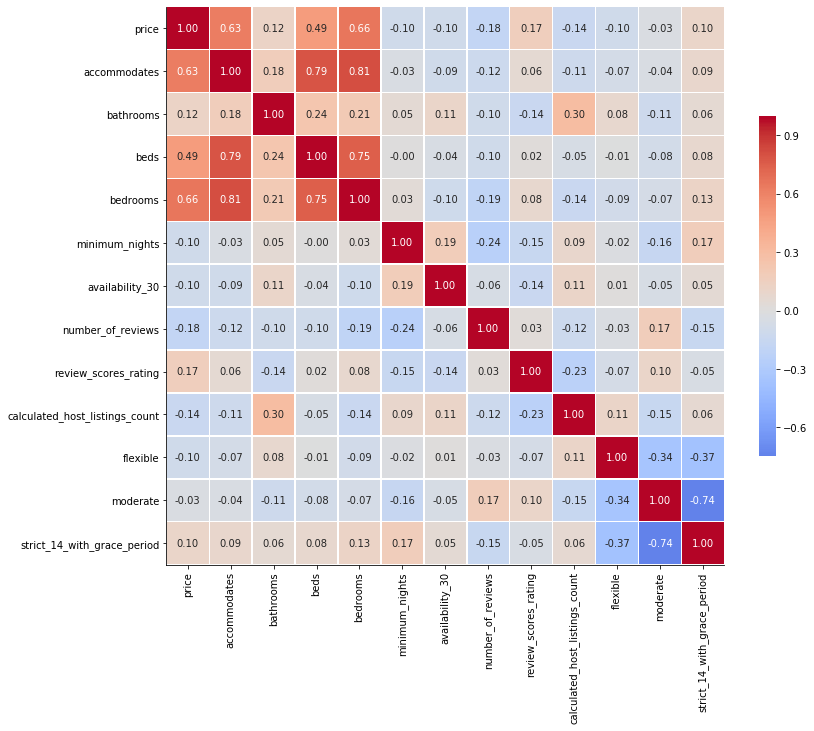

In [242]:
ax = sns.heatmap(continuous_df_corr,  vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
ax.figure.set_size_inches(12.5,12.5)
 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [243]:
# remove < 20 sample size from boxplot
data.bedrooms.value_counts()<20 
# remove 6 to 8

1.0    False
2.0    False
3.0    False
4.0    False
5.0     True
Name: bedrooms, dtype: bool

In [244]:
bedrooms_boxplot = data[~data['bedrooms'].isin([6,8,7])]

In [245]:
val = data.bathrooms.value_counts()<20
val

1.0     False
2.0     False
1.5     False
2.5     False
3.0     False
5.0     False
4.0     False
3.5     False
10.0    False
0.5      True
7.0      True
6.0      True
4.5      True
8.0      True
6.5      True
Name: bathrooms, dtype: bool

In [246]:
bathrooms_boxplot = data[~data['bathrooms'].isin([.5,4.5,7,6,8,6.5])]

In [247]:
data.accommodates.value_counts()<20

2     False
4     False
1     False
3     False
6     False
5     False
8     False
7     False
10     True
12     True
9      True
11     True
15     True
14     True
13     True
Name: accommodates, dtype: bool

In [248]:
accommodates_boxplot = data[~data['accommodates'].isin([12,9,11,15,14,16,13])]

In [249]:
data.beds.value_counts()<20

1.0     False
2.0     False
3.0     False
4.0     False
5.0     False
6.0     False
8.0      True
7.0      True
9.0      True
11.0     True
13.0     True
Name: beds, dtype: bool

In [250]:
bed_boxplot = data[data.beds < 8] 

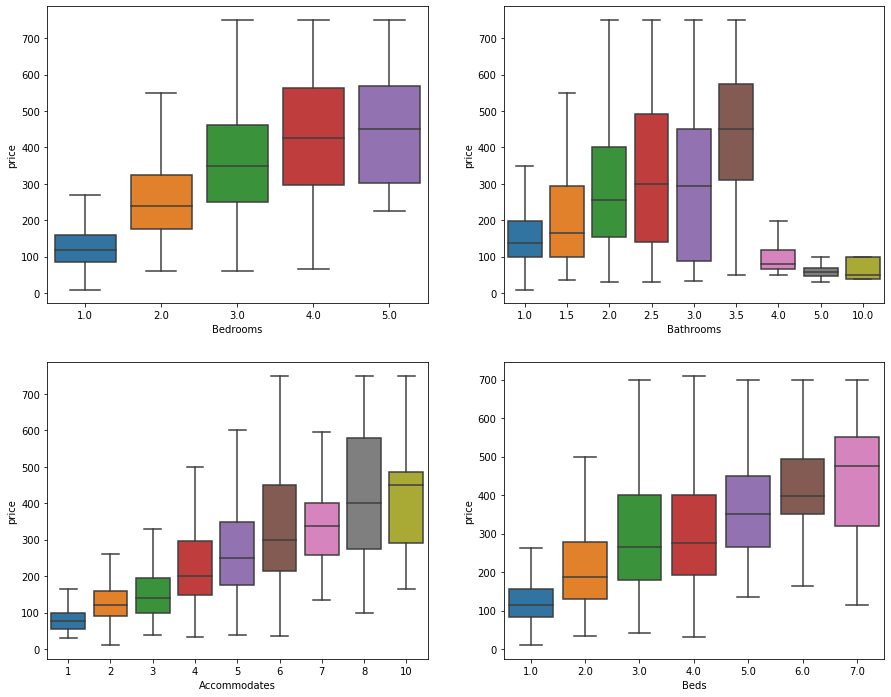

In [251]:
# EDITED VERSION of below with <20 sample size filtered out

fig_ = plt.figure(figsize=(15,12))

_ = plt.subplot(2,2,1)
_ = sns.boxplot('bedrooms','price',data=bedrooms_boxplot, showfliers=False)
_ = plt.xlabel('Bedrooms')

_ = plt.subplot(2,2,2)
_ = sns.boxplot('bathrooms','price',data=bathrooms_boxplot, showfliers=False)
_ = plt.xlabel('Bathrooms')

_ = plt.subplot(2,2,3)
_ = sns.boxplot('accommodates','price',data=accommodates_boxplot, showfliers=False)
_ = plt.xlabel('Accommodates')

_ = plt.subplot(2,2,4)
_ = sns.boxplot('beds','price',data=bed_boxplot, showfliers=False)
_ = plt.xlabel('Beds')

In [252]:
# Pearson correlation

print("bedrooms:",stats.pearsonr(bedrooms_boxplot.price, bedrooms_boxplot.bedrooms))
print("bathrooms:",stats.pearsonr(bedrooms_boxplot.price, bedrooms_boxplot.bathrooms))
print("accommodates:",stats.pearsonr(bedrooms_boxplot.price, bedrooms_boxplot.accommodates))
print("beds:",stats.pearsonr(bedrooms_boxplot.price, bedrooms_boxplot.beds))

bedrooms: (0.6570415578588241, 0.0)
bathrooms: (0.1154567890918281, 1.0723767158451098e-13)
accommodates: (0.6259127490609826, 0.0)
beds: (0.48651409738568263, 9.972718388728583e-244)


# Room Type

In [253]:
data.room_type.value_counts() # checking n amount <20; all values valid

Entire home/apt    2223
Private room       1743
Shared room         119
Hotel room           33
Name: room_type, dtype: int64

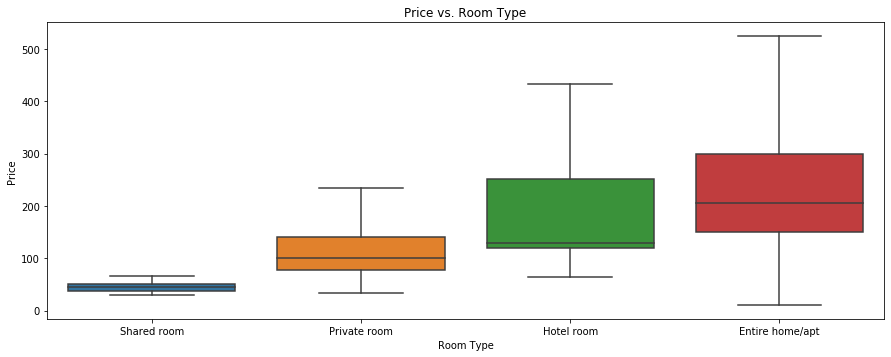

In [254]:
fig_ = plt.figure(figsize=(15,12))

_ = plt.subplot(2,1,1)
_ = sns.boxplot('room_type','price',data=data, showfliers=False,order=['Shared room','Private room',
                                                                       'Hotel room','Entire home/apt'])
_ = plt.xlabel('Room Type')
_ = plt.ylabel('Price')
_ = plt.title('Price vs. Room Type')

In [255]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [256]:
# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(data['price'], data['room_type'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

# 95% conf interval for tukey test; with exception of hotel room/entire home, 
#each of these groups are statistically significant; stat diff: conf that difference in means 
# 6/3 say all groups sig sign w exception of hotel and apt and say using tukey test

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1        group2     meandiff p-adj    lower     upper   reject
------------------------------------------------------------------------
Entire home/apt   Hotel room  -18.8967 0.7533  -70.1478   32.3545  False
Entire home/apt Private room -132.1615  0.001 -141.5117 -122.8114   True
Entire home/apt  Shared room -197.7164  0.001  -225.215 -170.2177   True
     Hotel room Private room -113.2649  0.001 -164.6192  -61.9105   True
     Hotel room  Shared room -178.8197  0.001 -236.3177 -121.3218   True
   Private room  Shared room  -65.5549  0.001  -93.2452  -37.8645   True
------------------------------------------------------------------------


# Property Type

In [257]:
property_medians = data.groupby(['property_type'])['price'].median()
property_medians.sort_values(ascending=False, inplace=True)
property_medians # ordered medians

property_type
Resort                432.0
Earth house           354.5
Cottage               227.0
Loft                  200.0
Aparthotel            199.0
Boutique hotel        195.0
Serviced apartment    189.0
Hotel                 189.0
Condominium           188.5
Bungalow              170.0
Other                 162.0
Tiny house            159.0
Townhouse             152.5
Apartment             150.0
Guesthouse            150.0
Guest suite           147.0
House                 133.0
Dome house            122.0
Cabin                 119.0
Castle                 69.0
Hostel                 50.0
Bed and breakfast      50.0
Villa                  37.0
Name: price, dtype: float64

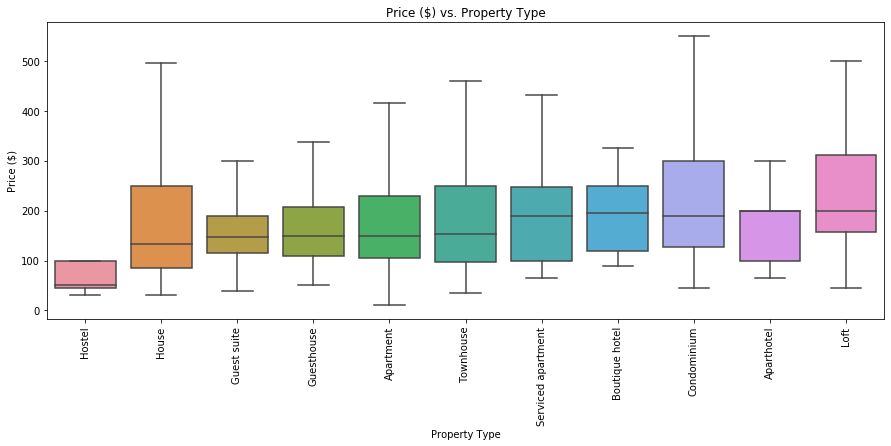

In [258]:
plt.figure(figsize=(15,12))

_ = plt.subplot(2,1,1)
_ = sns.boxplot('property_type','price',data=data,showfliers=False,
                order=['Hostel','House','Guest suite','Guesthouse',
                       'Apartment','Townhouse','Serviced apartment',
                       'Boutique hotel','Condominium','Aparthotel','Loft'])            
_ = plt.xlabel('Property Type')
_ = plt.ylabel('Price ($)')
_ = plt.title('Price ($) vs. Property Type')
_ = plt.xticks(rotation=90)

In [259]:
ptype = data[['id','property_type','price']]

In [260]:
p_df = ptype.pivot(index='id', columns='property_type')
p_df = p_df['price']
p_df.head()

property_type,Aparthotel,Apartment,Bed and breakfast,Boutique hotel,Bungalow,Cabin,Castle,Condominium,Cottage,Dome house,Earth house,Guest suite,Guesthouse,Hostel,Hotel,House,Loft,Other,Resort,Serviced apartment,Tiny house,Townhouse,Villa
id,,,,,,,,,,,,,,,,,,,,,,,
958,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7918,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8142,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
property = data['property_type']
property_dummies = pd.get_dummies(property.apply(pd.Series).stack()).sum(level=0)

property_df = pd.concat([data, property_dummies], axis=1)

In [262]:
property_df.head()

,id,summary,description,transit,host_id,host_is_superhost,host_neighbourhood,host_has_profile_pic,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,calculated_host_listings_count,flexible,moderate,strict_14_with_grace_period,Aparthotel,Apartment,Bed and breakfast,Boutique hotel,Bungalow,Cabin,Castle,Condominium,Cottage,Dome house,Earth house,Guest suite,Guesthouse,Hostel,Hotel,House,Loft,Other,Resort,Serviced apartment,Tiny house,Townhouse,Villa
0,958,New update: the house next door is under const...,New update: the house next door is under const...,*Public Transportation is 1/2 block away. *Ce...,1169,t,Duboce Triangle,t,94117,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"[TV, Cable TV, Internet, Wifi, Kitchen, Pets l...",170.0,1,2,226,97.0,f,f,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3850,Your own private room plus access to a shared ...,Your own private room plus access to a shared ...,Public transit service to my house is outstand...,4921,t,Inner Sunset,t,94131,House,Private room,2,1.0,1.0,1.0,Real Bed,"[Internet, Wifi, Kitchen, Breakfast, Free stre...",99.0,1,18,175,95.0,f,f,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,7918,Nice and good public transportation. 7 minute...,Nice and good public transportation. 7 minute...,N Juda Muni and bus stop. Street parking.,21994,t,Cole Valley,t,94117,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"[TV, Internet, Wifi, Kitchen, Free street park...",65.0,32,30,18,86.0,f,f,9,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8142,Nice and good public transportation. 7 minute...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle. small shopp...",21994,t,Cole Valley,t,94117,Apartment,Private room,2,4.0,1.0,1.0,Real Bed,"[TV, Internet, Wifi, Kitchen, Free street park...",65.0,32,30,8,93.0,f,f,9,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,8739,"Welcome to ""The Mission,"" the sunniest neighbo...","Welcome to ""The Mission,"" the sunniest neighbo...",It's an easy and enjoyable 10 minute stroll to...,7149,t,Mission District,t,94110,Condominium,Private room,3,1.0,1.0,2.0,Real Bed,"[TV, Cable TV, Internet, Wifi, Pets live on th...",139.0,1,0,713,98.0,t,f,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### property_df -- property dataframe

In [263]:
from scipy import stats
# one input where house is 1 and the other where house is 0 (look back at frequentist assignment)
print('house:',stats.ttest_ind(property_df.price,property_df.House))
print('hostel:',stats.ttest_ind(property_df.price,property_df.Hostel))
print('guest suite:',stats.ttest_ind(property_df.price,property_df['Guest suite'])) #edit
print('apartment:',stats.ttest_ind(property_df.price,property_df.Guesthouse))
print('townhouse:',stats.ttest_ind(property_df.price,property_df.Apartment))
print('serviced apt:',stats.ttest_ind(property_df.price,property_df.Townhouse))
print('boutique hotel:',stats.ttest_ind(property_df.price,property_df.House)) #edit
print('condominium:',stats.ttest_ind(property_df.price,property_df.Condominium))
print('aparthotel:',stats.ttest_ind(property_df.price,property_df.Aparthotel))
print('loft:',stats.ttest_ind(property_df.price,property_df.Loft))

# is this the correct way?  If so, complete for the rest of the columns; only top 

house: Ttest_indResult(statistic=91.56971900935395, pvalue=0.0)
hostel: Ttest_indResult(statistic=91.7369423741257, pvalue=0.0)
guest suite: Ttest_indResult(statistic=91.69649283064963, pvalue=0.0)
apartment: Ttest_indResult(statistic=91.74083593451262, pvalue=0.0)
townhouse: Ttest_indResult(statistic=91.5850024107645, pvalue=0.0)
serviced apt: Ttest_indResult(statistic=91.73387495713138, pvalue=0.0)
boutique hotel: Ttest_indResult(statistic=91.56971900935395, pvalue=0.0)
condominium: Ttest_indResult(statistic=91.68906726462417, pvalue=0.0)
aparthotel: Ttest_indResult(statistic=91.74107191866887, pvalue=0.0)
loft: Ttest_indResult(statistic=91.73717833791767, pvalue=0.0)


In [264]:
house_1 = property_df[(property_df['House'] == 1)]
house_0 = property_df[(property_df['House'] == 0)]

apt_1 = property_df[(property_df['Apartment'] == 1)]
apt_0 = property_df[(property_df['Apartment'] == 0)]

condo_1 = property_df[(property_df['Condominium'] == 1)]
condo_0 = property_df[(property_df['Condominium'] == 0)]

guestsuite_1 = property_df[(property_df['Guest suite'] == 1)]
guestsuite_0 = property_df[(property_df['Guest suite'] == 0)]

townhouse_1 = property_df[(property_df['Townhouse'] == 1)]
townhouse_0 = property_df[(property_df['Townhouse'] == 0)]

loft_1 = property_df[(property_df['Loft'] == 1)]
loft_0 = property_df[(property_df['Loft'] == 0)]

hostel_1 = property_df[(property_df['Hostel'] == 1)]
hostel_0 = property_df[(property_df['Hostel'] == 0)]

boutique_hotel_1 = property_df[(property_df['Boutique hotel'] == 1)]
boutique_hotel_0 = property_df[(property_df['Boutique hotel'] == 0)]

aparthotel_1 = property_df[(property_df['Aparthotel'] == 1)]
aparthotel_0 = property_df[(property_df['Aparthotel'] == 0)]

guesthouse_1 = property_df[(property_df['Guesthouse'] == 1)]
guesthouse_0 = property_df[(property_df['Guesthouse'] == 0)]

# add to milestone and story

In [265]:
print('house:',stats.ttest_ind(house_1.price,house_0.price))
print('apartment:',stats.ttest_ind(apt_1.price,apt_0.price))
print('condo:',stats.ttest_ind(condo_1.price,condo_0.price))
print('guestsuite:',stats.ttest_ind(guestsuite_1.price,guestsuite_0.price))
print('townhouse:',stats.ttest_ind(townhouse_1.price,townhouse_0.price))
print('loft:',stats.ttest_ind(loft_1.price,loft_0.price))
print('hostel:',stats.ttest_ind(hostel_1.price,hostel_0.price))
print('boutique hotel:',stats.ttest_ind(house_1.price,house_0.price))
print('aparthotel:',stats.ttest_ind(boutique_hotel_1.price,boutique_hotel_0.price))
print('guesthouse:',stats.ttest_ind(guesthouse_1.price,guesthouse_0.price))
#.005 p value

house: Ttest_indResult(statistic=0.15400387367128537, pvalue=0.8776142313788919)
apartment: Ttest_indResult(statistic=-0.8870092877800283, pvalue=0.37512572430498536)
condo: Ttest_indResult(statistic=7.168369626012518, pvalue=8.952994847306037e-13)
guestsuite: Ttest_indResult(statistic=-4.807601208519665, pvalue=1.5820593450704942e-06)
townhouse: Ttest_indResult(statistic=0.5190938703071286, pvalue=0.603723191395044)
loft: Ttest_indResult(statistic=3.269175460024333, pvalue=0.0010874825636556936)
hostel: Ttest_indResult(statistic=-6.941177905563185, pvalue=4.498198000051323e-12)
boutique hotel: Ttest_indResult(statistic=0.15400387367128537, pvalue=0.8776142313788919)
aparthotel: Ttest_indResult(statistic=0.2835301963140159, pvalue=0.7767846974203824)
guesthouse: Ttest_indResult(statistic=-0.023461528994905716, pvalue=0.9812832627258058)


In [266]:
top_10_properties = property_df[['price','House','Apartment','Condominium','Guest suite','Townhouse','Loft','Hostel','Boutique hotel','Aparthotel','Guesthouse']]

# Review Scores Rating

In [97]:
data['review_scores_rating'].value_counts()

100.0    1087
98.0      572
99.0      533
97.0      442
96.0      328
95.0      261
94.0      164
93.0      160
92.0       94
90.0       88
80.0       63
91.0       55
89.0       47
87.0       46
88.0       43
85.0       24
86.0       21
60.0       15
83.0       14
84.0       12
70.0        9
82.0        6
40.0        5
73.0        4
75.0        3
20.0        3
81.0        3
77.0        2
50.0        2
72.0        2
56.0        2
67.0        2
78.0        1
30.0        1
76.0        1
47.0        1
64.0        1
74.0        1
Name: review_scores_rating, dtype: int64

In [98]:
data.review_scores_rating.isna().sum() #total Nan values

0

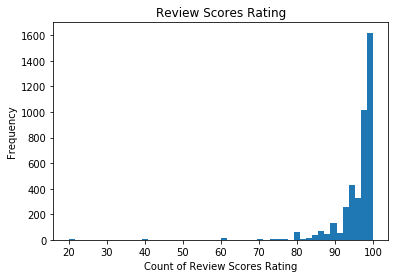

In [99]:
plt.hist(data['review_scores_rating'], bins=50)
plt.title("Review Scores Rating")
plt.xlabel("Count of Review Scores Rating")
plt.ylabel("Frequency")
plt.show()

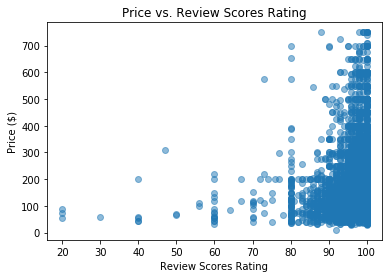

In [100]:
plt.scatter(data.review_scores_rating, data.price, alpha=0.5)
plt.title('Price vs. Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price ($)')
plt.show()

Text(0, 0.5, 'Price ($)')

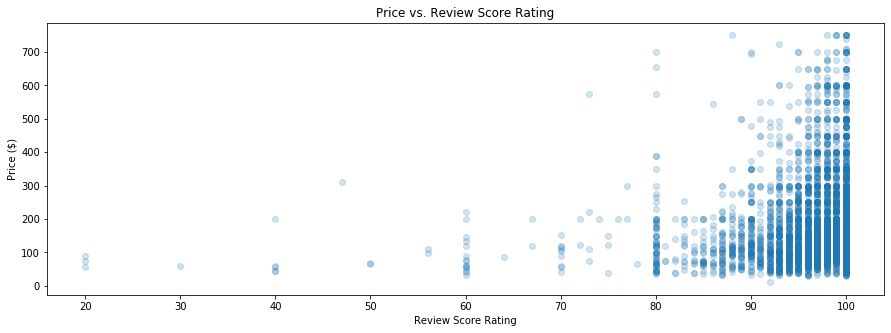

In [101]:
plt.figure(figsize=(15,5))
plt.scatter(data.review_scores_rating, data.price, alpha=0.2)
plt.title('Price vs. Review Score Rating')
plt.xlabel('Review Score Rating')
plt.ylabel('Price ($)')

In [102]:
reviews = data[['price','number_of_reviews']]

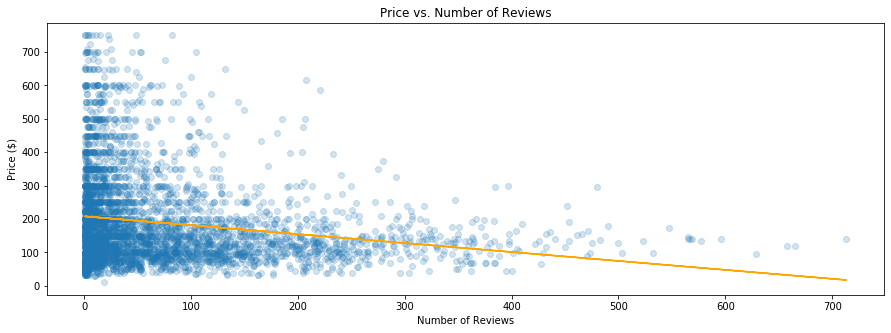

In [103]:
plt.figure(figsize=(15,5))
plt.scatter(reviews.number_of_reviews, reviews.price, alpha=0.2)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')

m, b = np.polyfit(reviews.number_of_reviews, reviews.price, 1)
plt.plot(reviews.number_of_reviews, m*reviews.number_of_reviews + b, color='orange')

plt.show()

In [104]:
# Pearson correlation for price

for x, y in reviews.iteritems():
    pb = stats.pointbiserialr(reviews.price,y)   
    print(pb, x)

PointbiserialrResult(correlation=1.0, pvalue=0.0) price
PointbiserialrResult(correlation=-0.18245702911253542, pvalue=3.7117858522046675e-32) number_of_reviews


The scatter plot above shows the number of reviews are highest for listings lowest in price.

In [105]:
pd.options.mode.chained_assignment = None  # default='warn'
review_log = reviews # new dataframe to show only price and property type
review_log['log_price'] = np.log(review_log.price)
# added logged_price values

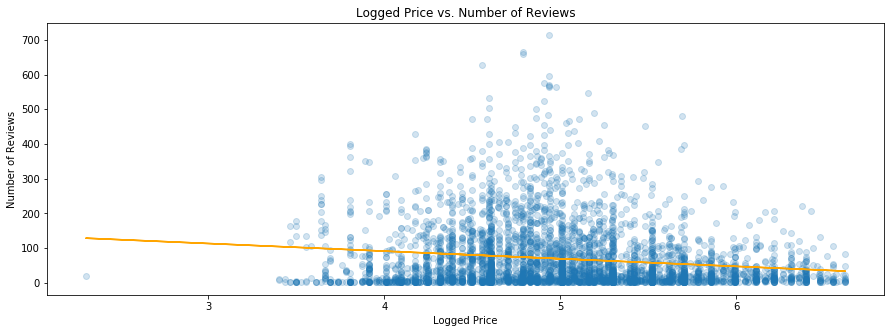

In [106]:
plt.figure(figsize=(15,5))
plt.scatter(review_log.log_price, review_log.number_of_reviews, alpha=0.2)
plt.title('Logged Price vs. Number of Reviews')
plt.xlabel('Logged Price')
plt.ylabel('Number of Reviews')

m, b = np.polyfit(review_log.log_price, review_log.number_of_reviews, 1)
plt.plot(review_log.log_price, m*review_log.log_price + b, color='orange')

plt.show()
# put price on y-axis 4/8

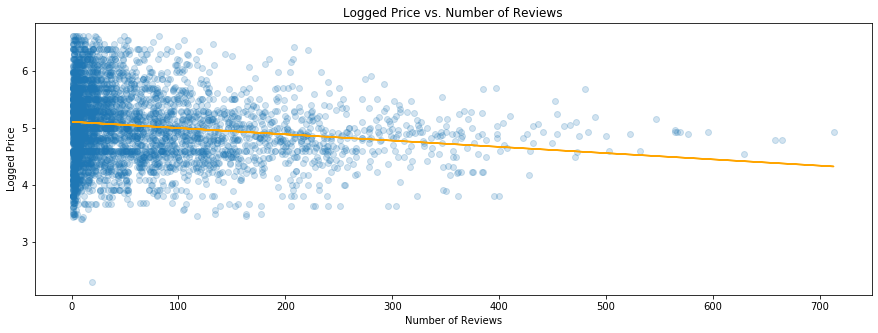

In [107]:
plt.figure(figsize=(15,5))
plt.scatter(review_log.number_of_reviews, review_log.log_price, alpha=0.2)
plt.title('Logged Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Logged Price')

m, b = np.polyfit(review_log.number_of_reviews, review_log.log_price, 1)
plt.plot(review_log.number_of_reviews, m*review_log.number_of_reviews + b, color='orange')

plt.show()
# put price on y-axis 4/8

In [108]:
stats.normaltest(review_log.log_price) #testing null hyp that sample comes from normal dist;  logged price not normal

NormaltestResult(statistic=35.77395308887814, pvalue=1.70523716285914e-08)

(array([1.000e+00, 0.000e+00, 2.400e+01, 1.980e+02, 5.270e+02, 1.015e+03,
        1.110e+03, 6.670e+02, 3.660e+02, 2.100e+02]),
 array([2.30258509, 2.7343339 , 3.16608272, 3.59783153, 4.02958034,
        4.46132915, 4.89307796, 5.32482677, 5.75657558, 6.1883244 ,
        6.62007321]),
 <a list of 10 Patch objects>)

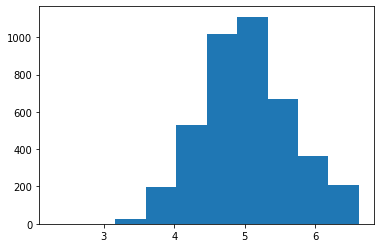

In [109]:
plt.hist(review_log.log_price)

# Machine Learning:

In [110]:
ml_df = continuous_df.copy().drop(['accommodates','strict_14_with_grace_period','beds'],axis=1) 
# dropping accommodates and strict 14 because similar to other columns
# view large heatmap from earlier for reference

In [111]:
# response variable for price predictions
Y = ml_df['price']

# our features for price
X = ml_df.drop(['price'], axis=1)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [112]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: -127.69632566950713


In [114]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 9


In [115]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,bathrooms,1.008190
1,bedrooms,105.600163
2,minimum_nights,-1.146710
3,availability_30,0.070600
4,number_of_reviews,-0.142420
5,review_scores_rating,1.975249
6,calculated_host_listings_count,-0.462428
7,flexible,-19.347911
8,moderate,-5.986784


In [116]:
# VIF - used to test multicollinearity b/w 3 or more values in a regression model
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

feat = "+".join(ml_df.columns.difference(["price"]))

# get y and X dataframes based on this regression:
vif_y, vif_X = dmatrices('price ~' + feat, ml_df, return_type='dataframe')

# for each X, calculate VIF and save in df
vif_ = pd.DataFrame()
vif_["VIF Factor"] = [variance_inflation_factor(vif_X.values, i) for i in range(vif_X.shape[1])]
vif_["features"] = vif_X.columns

vif_.round(1) 

,VIF Factor,features
0,296.9,Intercept
1,1.1,availability_30
2,1.2,bathrooms
3,1.2,bedrooms
4,1.2,calculated_host_listings_count
5,1.2,flexible
6,1.1,minimum_nights
7,1.2,moderate
8,1.1,number_of_reviews
9,1.1,review_scores_rating


In [117]:
# first five predicted prices
lm.predict(X)[0:5]

array([130.86943397, 140.37389685, 110.5058341 , 125.75677804,
        68.86914294])

In [275]:
predict = lm.predict(X)

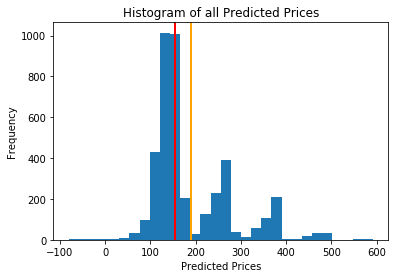

In [118]:
plt.hist(lm.predict(X), bins=30)
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")
plt.axvline(np.median(lm.predict(X)), ls='-', c='red', lw=2)
plt.axvline(np.mean(lm.predict(X)), ls='-', c='orange', lw=2)
plt.title("Histogram of all Predicted Prices")

plt.show()

The distribution looks normally distributed with the mean and the median around $160. There appears to be a negative value in the data which might be an outlier.

In [119]:
# medan value of the prices
print("Median value of the Airbnb prices is: {}".format(np.median(lm.predict(X))))

Median value of the Airbnb prices is: 154.12814543753296


In [120]:
# residual sum of squares

print(np.sum((Y - lm.predict(X)) ** 2))

38681869.70804668


In [121]:
# explained sum of squares

print(np.sum((lm.predict(X) - np.mean(Y)) ** 2))

33894418.5950129


In [122]:
from statsmodels.formula.api import ols

bed_ols = ols('price ~ bedrooms', ml_df).fit()          
bed_ols.summary() # using least squares to estimate coefficients

# bedrooms is highly correlated with $111 increase and p value is almost 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     3127.
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:58:06   Log-Likelihood:                -24811.
No. Observations:                4118   AIC:                         4.963e+04
Df Residuals:                    4116   BIC:                         4.964e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.8967      3.321      7.798      0.000      19.386      32.407
bedrooms     111.3185      1.991     55.917      0.000     107.415     115.222
==============================================================================
Omnibus:                     1023.752   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3241.225
Skew:                           1.255   Prob(JB):                         0.00
Kurtosis:                       6.549   Cond. No.                         4.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

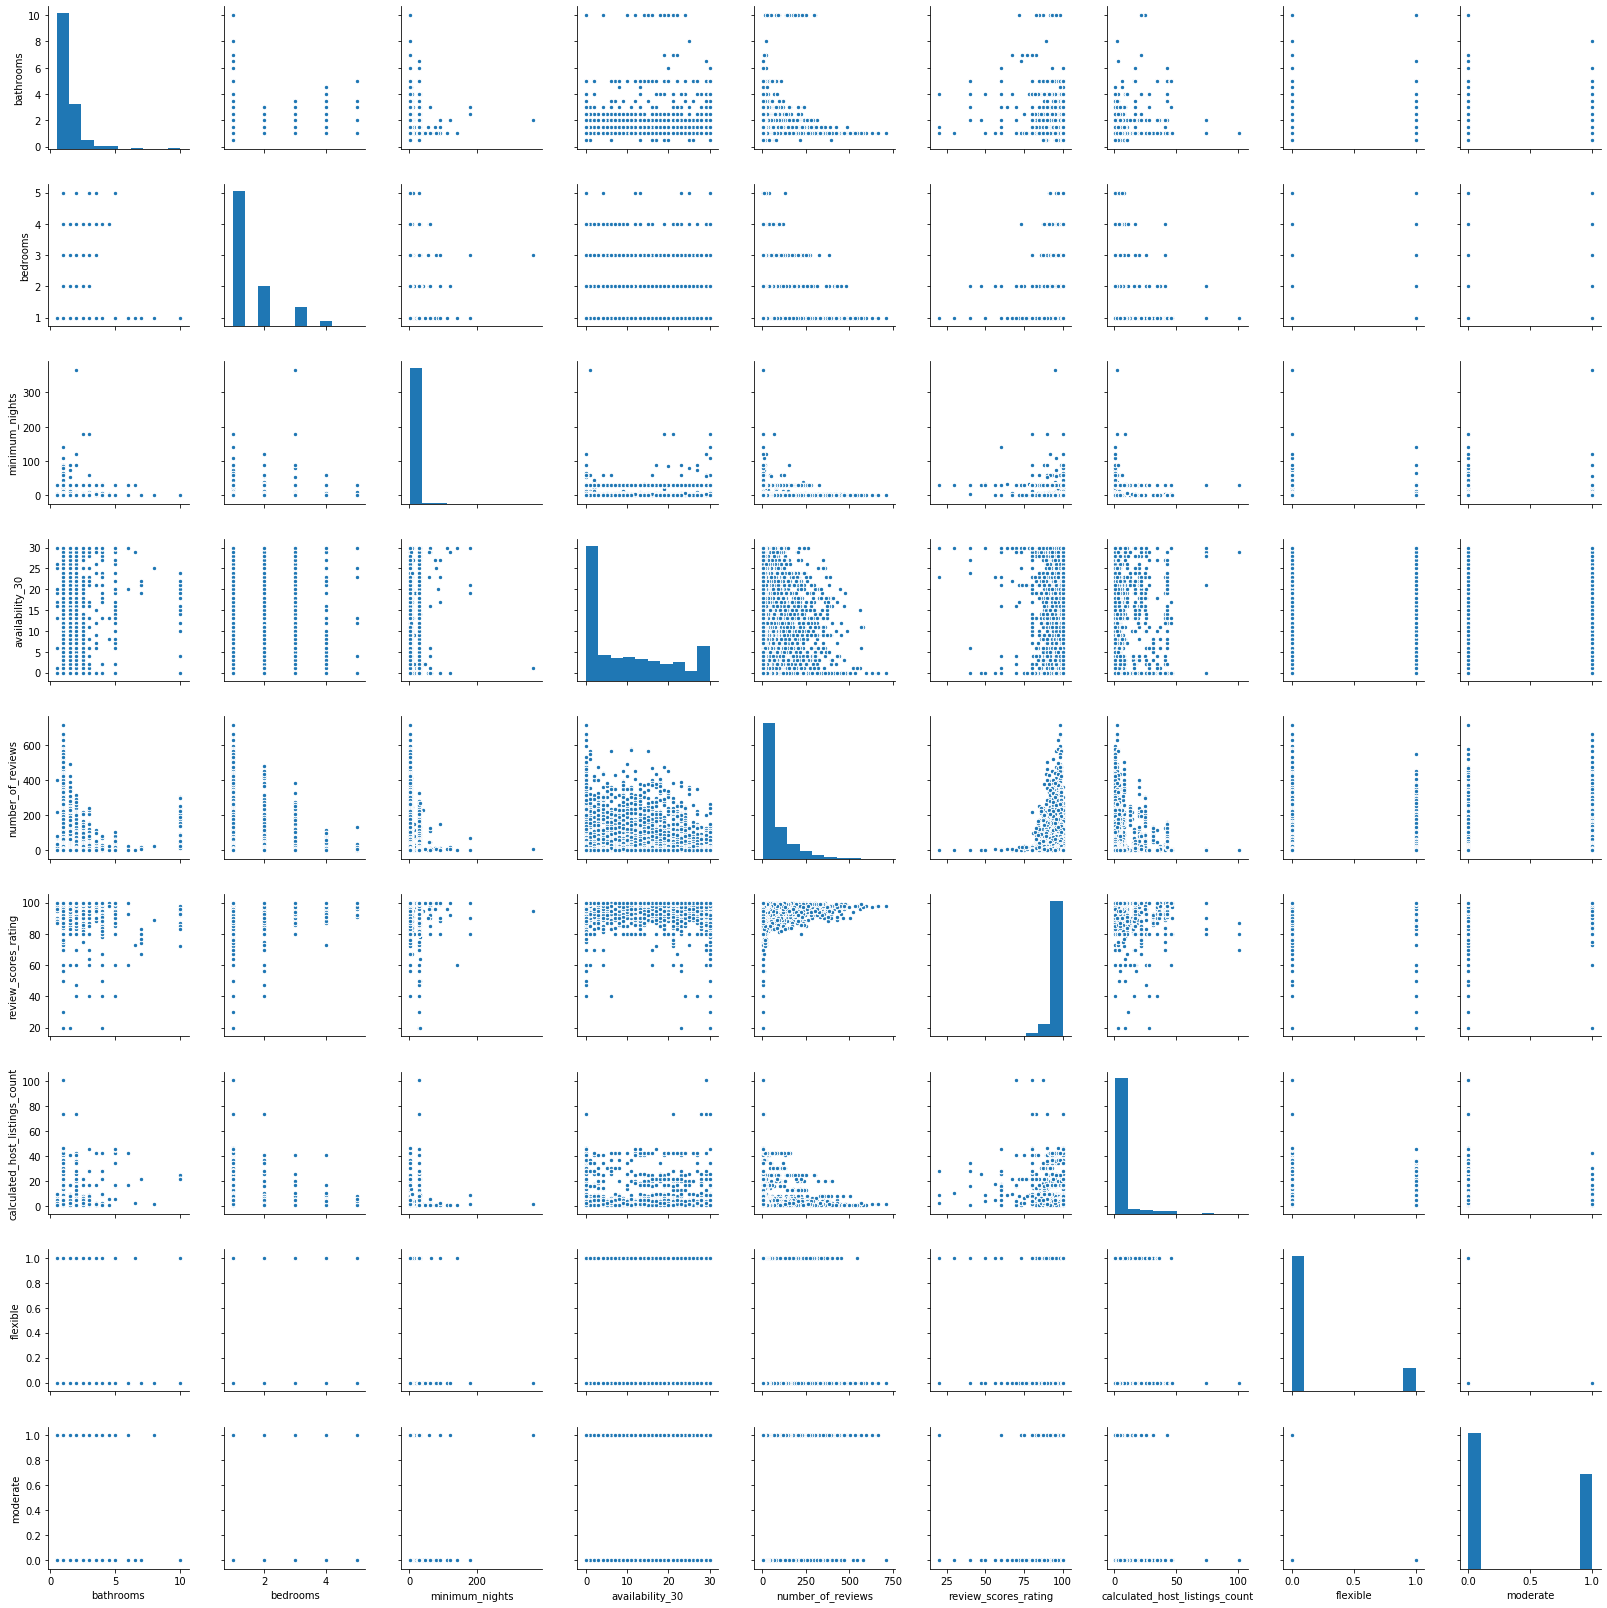

In [123]:
# pairplots to eyeball the relationship of 'RM' with other variables
data = ml_df[['bathrooms', 'bedrooms', 'minimum_nights', 'availability_30', 'number_of_reviews','review_scores_rating','calculated_host_listings_count','flexible','moderate']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

One of the assumptions of linear regression is that there should be little or no multicollinearity between the features. This is because if features are colinear (correlated) with each other, it diminishes the model's ability to explain variance.  I've chosen to keep the features that don't appear correlated with bedrooms.

In [124]:
ols_edited_col = ols('price ~ bedrooms + bathrooms + minimum_nights + availability_30 + flexible + moderate', ml_df).fit()
ols_edited_col.summary()

# for every increase in bedrooms, a $111 increase in price

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     559.9
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:58:55   Log-Likelihood:                -24744.
No. Observations:                4118   AIC:                         4.950e+04
Df Residuals:                    4111   BIC:                         4.955e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          46.0496      4.686      9.826      0.000      36.862      55.238
bedrooms          111.3531      2.042     54.526      0.000     107.349     115.357
bathrooms          -1.6596      1.620     -1.025      0.306      -4.835       1.516
minimum_nights     -1.0812      0.102    -10.622      0.000      -1.281      -0.882
availability_30    -0.0238      0.156     -0.153      0.878      -0.329       0.282
flexible          -20.6895      4.714     -4.389      0.000     -29.931     -11.448
moderate           -6.6859      3.402     -1.965      0.049     -13.356      -0.016
==============================================================================
Omnibus:                     1062.506   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3417.831
Skew:                           1.297   Prob(JB):                         0.00
Kurtosis:                       6.632   Cond. No.                         80.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

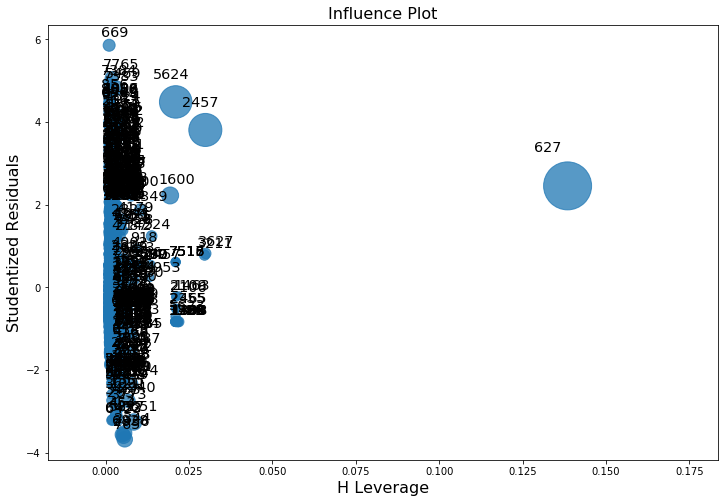

In [125]:
from statsmodels.graphics.regressionplots import *
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(ols_edited_col, ax=ax, criterion="cooks")
plt.show()

# showing high leverage points

In [126]:
# calculate large values of leverage
influence = ols_edited_col.get_influence()

# leverage (hat values)
leverage = influence.hat_matrix_diag

In [127]:
p = 4
n = 4118
lev_threshold = 2 * (p/n)
lev_threshold

0.001942690626517727

In [128]:
# filter the index for which the values are higher than lev_threshold

large_lev_idx = np.where(leverage > lev_threshold)
print(type(large_lev_idx[0]))
#large_lev_idx[0]

<class 'numpy.ndarray'>


In [129]:
ml_df_clean = ml_df.drop(ml_df.index[large_lev_idx[0]]) # dropped outliers from above

In [130]:
# model excluding high leverage

excl_lev = ols('price ~ bedrooms + bathrooms + minimum_nights + availability_30 + flexible + moderate', ml_df_clean).fit()
excl_lev.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     372.6
Date:                Fri, 21 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:59:12   Log-Likelihood:                -19122.
No. Observations:                3219   AIC:                         3.826e+04
Df Residuals:                    3212   BIC:                         3.830e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          14.2083      6.457      2.201      0.028       1.549      26.868
bedrooms          113.3093      3.027     37.435      0.000     107.375     119.244
bathrooms          21.6149      4.394      4.919      0.000      13.000      30.230
minimum_nights     -1.2125      0.140     -8.665      0.000      -1.487      -0.938
availability_30     0.3603      0.179      2.009      0.045       0.009       0.712
flexible          -30.6427      9.878     -3.102      0.002     -50.010     -11.275
moderate           -6.4082      3.433     -1.867      0.062     -13.139       0.323
==============================================================================
Omnibus:                      924.403   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3188.440
Skew:                           1.416   Prob(JB):                         0.00
Kurtosis:                       6.969   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
ml_df_clean.shape

(3219, 10)

In [132]:
ml_df_clean.keys()

Index(['price', 'bathrooms', 'bedrooms', 'minimum_nights', 'availability_30', 'number_of_reviews', 'review_scores_rating', 'calculated_host_listings_count', 'flexible', 'moderate'], dtype='object')

In [133]:
ml_df_clean.describe()

,price,bathrooms,bedrooms,minimum_nights,availability_30,number_of_reviews,review_scores_rating,calculated_host_listings_count,flexible,moderate
count,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000,3219.000000
mean,183.221808,1.218080,1.367505,9.436782,8.703635,75.569432,96.429947,3.993166,0.029823,0.475303
std,119.773237,0.416565,0.617801,12.142589,9.321301,94.250172,4.706915,8.801482,0.170125,0.499467
min,10.000000,0.500000,1.000000,1.000000,0.000000,1.000000,47.000000,1.000000,0.000000,0.000000
25%,100.000000,1.000000,1.000000,2.000000,0.000000,11.000000,95.000000,1.000000,0.000000,0.000000
50%,150.000000,1.000000,1.000000,3.000000,6.000000,37.000000,98.000000,2.000000,0.000000,0.000000
75%,225.000000,1.500000,2.000000,30.000000,15.000000,106.000000,99.000000,3.000000,0.000000,1.000000
max,750.000000,3.000000,3.000000,40.000000,30.000000,713.000000,100.000000,101.000000,1.000000,1.000000


In [134]:
# response variable for price predictions
Y = ml_df_clean['price']


# our features for price
X = ml_df_clean.drop(['price'], axis=1)

In [135]:
from sklearn.model_selection import train_test_split


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [136]:
# feature scaling
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [137]:
X_train_scaled.shape, Y_train.shape

((2575, 9), (2575,))

In [138]:
X_test_scaled.shape, Y_test.shape

((644, 9), (644,))

In [139]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

linear_model = linear_model.LinearRegression()

In [140]:
linear_model.fit(X_train_scaled, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [141]:
Y_pred = linear_model.predict(X_test_scaled)

In [142]:
print('Intercept:', linear_model.intercept_)
print('Mean squared error (MSE): %.3f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.3f'
      % r2_score(Y_test, Y_pred))

Intercept: 159.23283295995282
Mean squared error (MSE): 9213.936
Coefficient of determination (R^2): 0.398


### Ridge Regression

In [143]:
from sklearn.linear_model import Ridge

In [144]:
r = Ridge()
r.fit(X_train_scaled, Y_train) 
pred_train_ridge= r.predict(X_train_scaled)
print('RMSE:',np.sqrt(mean_squared_error(Y_train,pred_train_ridge)))
print('R^2:',r2_score(Y_train, pred_train_ridge))

# this gets values from training set

RMSE: 88.98130986360708
R^2: 0.4381844907098589


In [145]:
# top-10 amenities

r = Ridge()
r.fit(X_train_scaled, Y_train) 
pred_train_ridge= r.predict(X_train_scaled)
print('RMSE:',np.sqrt(mean_squared_error(Y_train,pred_train_ridge)))
print('R^2:',r2_score(Y_train, pred_train_ridge))

# this gets values from training set

RMSE: 88.98130986360708
R^2: 0.4381844907098589


### Lasso

In [146]:
# lasso regularization forces some coefficients to be 0, so some features can be ignored by model
# good choice when we have many features, but expect only some to be important

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, Y_train) 
pred_train_lasso= lasso.predict(X_train_scaled)

print('RMSE:', np.sqrt(mean_squared_error(Y_train,pred_train_lasso)))
print('R^2:', r2_score(Y_train, pred_train_lasso))

RMSE: 89.1808507890927
R^2: 0.4356619186101335


In [147]:
# grid search to find optimal alpha value above for lasso -- worse?
# find optimal alpha with grid search

from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, Y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


C:\Users\jlreg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score:  0.4346084519105232
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    6.9s finished


In [148]:
# The coefficients

print('Number of coefficients: {}'.format(len(lasso.coef_)))
pd.DataFrame({'Features': ml_df_clean.columns.drop('price'), 'EstimatedCoefficients': lasso.coef_})[['Features','EstimatedCoefficients']]

Number of coefficients: 9


,Features,EstimatedCoefficients
0,bathrooms,9.933676
1,bedrooms,107.068167
2,minimum_nights,-29.727113
3,availability_30,3.453818
4,number_of_reviews,-11.775886
5,review_scores_rating,9.747427
6,calculated_host_listings_count,-0.417653
7,flexible,-0.000000
8,moderate,-0.721402


### Elastic-Net

In [149]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train_scaled, Y_train) 
pred_train_elastic= elastic.predict(X_train_scaled)

print('Intercept:', elastic.intercept_)
print('RSME:', np.sqrt(mean_squared_error(Y_train,pred_train_elastic)))
print('R^2:', r2_score(Y_train, pred_train_elastic))

Intercept: 171.02461364272438
RSME: 97.36222896573172
R^2: 0.327368579381326


In [150]:
# grid search to find optimal alpha value above for lasso -- worse?
# find optimal alpha with grid search

from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=elastic, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, Y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

C:\Users\jlreg\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best Score:  0.43461878044974434
Best Params:  {'alpha': 0.01}


[Parallel(n_jobs=-1)]: Done   6 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished


In [151]:
# The coefficients

print('Number of coefficients: {}'.format(len(elastic.coef_)))
pd.DataFrame({'Features': ml_df_clean.columns.drop('price'), 'EstimatedCoefficients': elastic.coef_})[['Features','EstimatedCoefficients']]

Number of coefficients: 9


,Features,EstimatedCoefficients
0,bathrooms,17.908299
1,bedrooms,44.314986
2,minimum_nights,-9.539577
3,availability_30,-2.425010
4,number_of_reviews,-11.234728
5,review_scores_rating,8.789748
6,calculated_host_listings_count,-1.615340
7,flexible,-1.041955
8,moderate,-1.766604


### Random Forest Regressor

In [152]:
from sklearn.ensemble import RandomForestRegressor 
  
# create regressor object 
random_forest = RandomForestRegressor(n_estimators = 10, random_state = 0) 
  
# fit the regressor with x and y data 
random_forest.fit(X_train_scaled, Y_train) # should train be used here?
randomforest_y_pred = random_forest.predict(X_test_scaled)

In [153]:
print('Intercept:', linear_model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, randomforest_y_pred))
print('Coefficient of determination (R^2): %.3f'
      % r2_score(Y_test, randomforest_y_pred))

Intercept: 159.23283295995282
Mean squared error (MSE): 9053.59
Coefficient of determination (R^2): 0.409


In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

In [155]:
# set up grid search meta-estimator
clf = GridSearchCV(random_forest, model_params, cv=5)

# train the grid search meta-estimator to find the best model
model = clf.fit(X_train_scaled, Y_train)

# print winning set of hyperparameters
from pprint import pprint
pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [156]:
# generate predictions using the best-performing model
predictions = random_forest.predict(X_train_scaled)
print(predictions)

[141.1 161.9 293.1 ... 504.7 210.8 103.7]


### KNN

In [157]:
from sklearn import neighbors
from math import sqrt

rmse_val = [] #to store rmse values for different k
for K in range(25):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train_scaled, Y_train)  #fit the model
    pred = knn.predict(X_test_scaled) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test, pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 109.51800810542018
RMSE value for k=  2 is: 102.42899752590324
RMSE value for k=  3 is: 99.39716500644347
RMSE value for k=  4 is: 98.0684347584009
RMSE value for k=  5 is: 97.85545367359244
RMSE value for k=  6 is: 97.39915663166897
RMSE value for k=  7 is: 96.62603184661009
RMSE value for k=  8 is: 96.40276630935584
RMSE value for k=  9 is: 96.29753667734701
RMSE value for k=  10 is: 95.69003052039324
RMSE value for k=  11 is: 95.64163007239785
RMSE value for k=  12 is: 95.80845365225
RMSE value for k=  13 is: 95.49062792975577
RMSE value for k=  14 is: 94.89426373981335
RMSE value for k=  15 is: 94.48538861192041
RMSE value for k=  16 is: 94.37853109653197
RMSE value for k=  17 is: 94.41532101472406
RMSE value for k=  18 is: 94.23696326281184
RMSE value for k=  19 is: 93.89496761256066
RMSE value for k=  20 is: 94.14461996400911
RMSE value for k=  21 is: 94.31256664581205
RMSE value for k=  22 is: 94.14186253498698
RMSE value for k=  23 is: 94.02355696403369

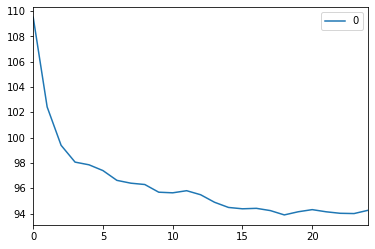

In [158]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [159]:
from sklearn.neighbors import KNeighborsRegressor

# without choosing knn value

knn = KNeighborsRegressor()
knn.fit(X_train_scaled,Y_train)
knn_y_pred = knn.predict(X_test_scaled)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, knn_y_pred))
print('Coefficient of determination (R^2): %.3f'
      % r2_score(Y_test, knn_y_pred))

# print('r^2:',knn.score(X_test_scaled,Y_test))

Mean squared error (MSE): 9575.69
Coefficient of determination (R^2): 0.375


In [160]:
knn = KNeighborsRegressor(n_neighbors=21) # chose knn=20 from elbow graph above
knn.fit(X_train_scaled,Y_train)
knn_y_pred = knn.predict(X_test_scaled)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, knn_y_pred))
print('Coefficient of determination (R^2): %.3f'
      % r2_score(Y_test, knn_y_pred))

# print('r^2:',knn.score(X_test_scaled,Y_test))

Mean squared error (MSE): 8894.86
Coefficient of determination (R^2): 0.419


In [309]:
a = ('Linear','Lasso','Random Forest','Ridge','Elastic-Net','KNN')
b = 'N/A', 'alpha = .01', 'cv = 5', 'N/A', 'alpha = .01', 'n = 6'
c = .398,.435,.409,.438,.435,.419

In [310]:
pd.DataFrame({'Model': a, 'Parameters': b, 'R^2 Score': c})[['Model','Parameters','R^2 Score']]
# ridge has highest r^2 score

,Model,Parameters,R^2 Score
0,Linear,N/A,0.398
1,Lasso,alpha = .01,0.435
2,Random Forest,cv = 5,0.409
3,Ridge,N/A,0.438
4,Elastic-Net,alpha = .01,0.435
5,KNN,n = 6,0.419
